## 1. 분류 개요

지도학습 : 명시적인 정답(레이블)이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식   
분류 : 주어진 데이터의 피처, 레이블값(결정 값, 클래스 값)을 학습해 모델 생성, 이 모델에 새로운 데이터를 학습시켰을 때 미지의 레이블 값을 예측

분류 구현이 가능한 알고리즘 종류
- 나이브 베이즈 : 베이즈 통계, 생성 모델에 기반
- 로지스틱 회귀 : 독립변수와 종속변수의 선형 관계성에 기반
- 결정 트리 : 데이터 균일도에 따른 규칙 기반
- 서포트 벡터 머신 : 개별 클래스 간 최대 분류 마진을 효과적으로 발견
- 최소 근접 알고리즘 : 근접 거리를 기준으로 분류
- 신경망 : 심층 연결 기반
- 앙상블 : 서로 다른 머신러닝 알고리즘 결합

## 2. 결정 트리

규칙 노드 : 규칙 조건   
리프 노드 : 결정된 클래스 값   
피처들을 결합해 많은 규칙을 만들 수록 복잡해지고 과적합으로 이어지기 쉬움   
→ 트리 깊이가 깊어질 수록 예측 성능이 저하될 가능성이 높음   
→ 최대한 균일한 데이터셋을 구성할 수 있도록 분할하는 것이 필요

정보의 균일도를 측정하는 방법   
1. 정보 이득 지수   
엔트로피 개념 기반   
서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음   
정보 이득 지수 = 1 - (엔트로피 지수)   
결정 트리 → 정보 이득이 높은 속성을 기준으로 분할
2. 지니 계수   
경제학에서의 불평등 지수   
0이 가장 평등, 1로 갈 수록 불평등   
결정 트리 → 지니 계수가 낮은 속성을 기준으로 분할

DecisionTreeClassfier
- 지니 계수를 이용해 데이터셋 분할

데이터셋 분할 과정
1. 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인
2. 리프 노드로 만들어서 분류 결정 (2-1)
3. 데이터 분할 시 가장 좋은 속성, 분할 기준 탐색 (2-2)
4. 해당 속성, 분할 기준으로 데이터 분할하여 Branch 노드 생성
5. 반복

### 특징

장점
- 알고리즘이 쉽고 직관적
- 시각화가 원활함
- 균일도만 신경 쓰면 됨 → 스케일링, 정규화 같은 전처리 작업 불필요

단점
- 과적합으로 정확도가 떨어짐 (가장 큰 단점)   
→ 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움이 됨

### 주요 파라미터

- min_samples_split   
노드를 분할하기 위한 최소한의 샘플 데이터 수   
과적합 제어에 사용   
작게 설정할 수록 노드가 많아져 과적합 가능성 증가
- min_samples_leaf   
말단 노드가 되기 위한 최소한의 샘플 데이터 수   
비대칭 데이터의 경우 작게 설정을 해주는 것이 중요
- max_features   
최적의 분할을 위해 고려할 최대 피처 개수
- max_depth   
트리의 최대 깊이 규정   
너무 깊어지면 과적합 가능성이 증가하므로 적절한 값으로 제어하는 것이 중요
- max_leaf_nodes   
말단 노드의 최대 개수

### 시각화

Graphviz 패키지 + 사이킷런의 export_graphviz( ) API 사용

붓꽃 데이터 셋에 결정 트리 적용 후 시각화

In [1]:
# graphviz 패키지 설치
! pip install graphviz

In [2]:
# 필요 패키지, 라이브러리 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 데이터 로드, 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [3]:
# export_graphviz 임포트
from sklearn.tree import export_graphviz

# 함수 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

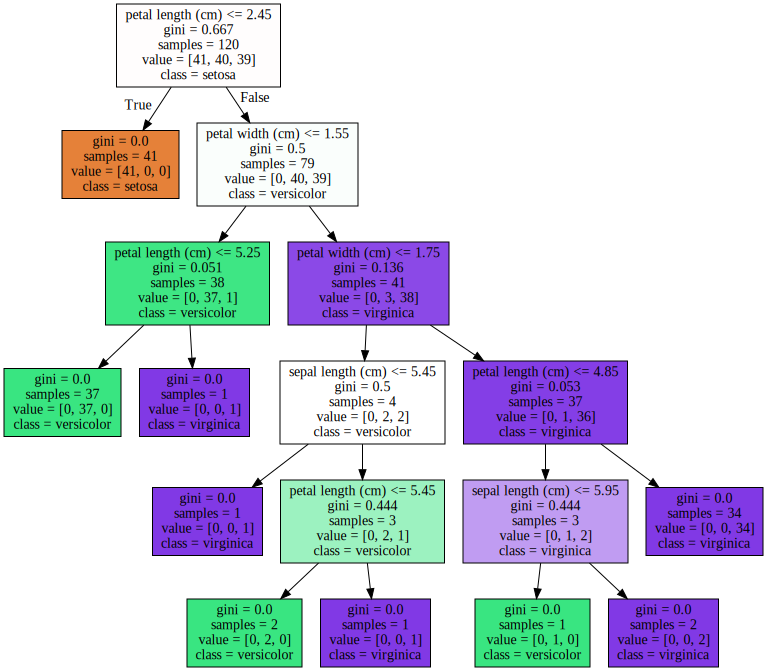

In [4]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(width) : 자식 노드를 만들기 위한 규칙 조건. 조건이 없을 경우 리프 노드 (더 이상 자식이 없는 노드)
- gini : value = [ ]로 주어진 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [ ] : 클래스 값 기반의 데이터 건수

결정 트리 → 균일도에 기반, 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건   
→ feature_importances_ 속성을 이용, 피처의 중요도 지표 확인 가능
- feature_importances_ : ndarray 형태로 값을 반환, 피처 순서대로 값이 할당됨. 값이 높을 수록 피처의 중요도가 높음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


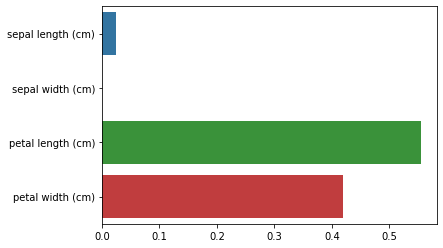

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# 시각화
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

petal length가 피처 중요도가 가장 높음을 확인 가능

### 과적합

make_classification( ) : 분류를 위한 테스트용 데이터를 쉽게 만들 수 있게 해주는 함수   
→ 2개의 피처, 3개의 클래스 값을 가지는 데이터셋 생성 후, 발생하는 과적합 문제 시각화

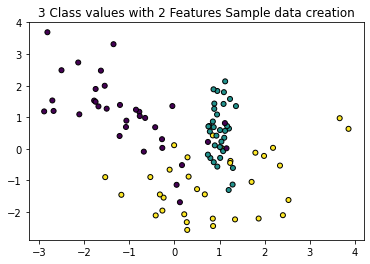

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 피처 2개, 클래스 3가지 유형의 분류 데이터 샘플 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1, random_state = 0)

# 시각화
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')

visualize_boundary( ) : 유틸리티 함수   
머신러닝 모델이 클래스 값을 예측하는 결정 기준 → 색상과 경계로 나타내 어떤 과정으로 예측 분류하는지 잘 이해할 수 있게 해줌

In [7]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

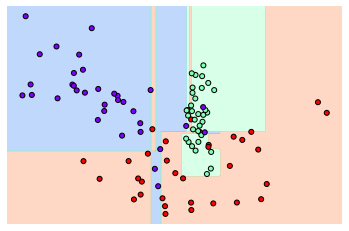

In [8]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치로 인해 경계가 많아지고 복잡해짐   
→ 파라미터 조정을 통해 수정

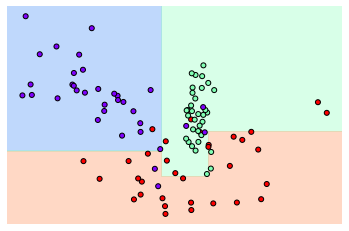

In [9]:
# min_samples_leaf = 6
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)